In [27]:
import pandas as pd

## Create datasets

In [7]:
df = pd.read_csv('ETTh1.csv', header=0)

display(df.head())

df['date'] = pd.to_datetime(df['date'])
# drop date
df = df.drop(columns=['date'])
display(df.head())

# write to csv
df.to_csv('ETTh1-clean.csv', index=False, header=False)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [ ]:
df = pd.read_csv('rcalix.csv', header=0)
display(df.head())
print(df.shape)

# remove first column, it's just an index
df = df.drop(columns=['Unnamed: 0'])

df = df.dropna() # i think axis=1 drops columns
# drop any columns with str
df = df.drop(df.select_dtypes(['object']), axis=1)

# drop any column with the min and max being the same.
# this will cause a division by zero error
# df = df.loc[:, (df != df.iloc[0]).any()] # does this remove the first row?
df = df.loc[:, (df.min() != df.max())]

display(df.head())
print(df.shape)

# split some of the end for testing
df_train = df.iloc[:int(df.shape[0] * 0.95)]
df_test = df.iloc[int(df.shape[0] * 0.95):]

# get number of values in each df
print(len(df_train.values.flatten()))
print(len(df_test.values.flatten()))

df_train.to_csv('rcalix-clean-train.csv', index=False, header=False)
df_test.to_csv('rcalix-clean-test.csv', index=False, header=False)

,Unnamed: 0,delta_SI,mov_avg_SI,SI_f1,Date_Map,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,...,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0,0.000000,0.0,0.719500,2022-01-01 00:45:00,4.242439,2161.425209,9306.840913,184.818611,0.0,...,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,1,0.000000,0.0,0.710486,2022-01-01 08:43:00,4.174343,2168.238915,9336.364456,185.993447,0.0,...,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,2,-0.044380,0.0,0.666106,2022-01-01 10:17:00,4.126144,2167.779119,9419.200115,185.828474,0.0,...,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,3,0.009040,0.0,0.675145,2022-01-01 12:40:00,4.120736,2166.974740,9564.165802,185.924481,0.0,...,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,4,0.101686,0.0,0.776831,2022-01-01 15:06:00,4.120331,2166.384674,9648.247637,185.942943,0.0,...,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0


(1394, 37)


,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,min,hour,...,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.0,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,45,0,...,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,0.000000,0.0,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,43,8,...,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,-0.044380,0.0,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,17,10,...,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,0.009040,0.0,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,40,12,...,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,0.101686,0.0,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,6,15,...,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0


(1394, 34)
45016
2380


## Dist of values

,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,min,hour,...,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,17017,20116,5996,5679,47424,34010,29863,0,38330,0,...,7347,20122,23748,31699,50254,33577,32852,0,43782,1291
1,17017,20116,5831,5486,48659,34118,31256,0,36626,17480,...,7330,13827,21551,22531,50255,32564,33702,0,43782,1291
2,16469,20116,5021,5350,48575,34420,31061,0,14480,21850,...,8016,11454,24449,23636,50255,32540,32750,50255,43769,1291
3,17128,20116,5186,5335,48430,34950,31174,0,34071,26220,...,5830,8565,21223,20212,50255,32363,33569,0,42673,1291
4,18271,20116,7043,5334,48323,35258,31196,0,5110,32775,...,6615,9837,21551,19218,50255,32554,33020,50255,44275,1291


(1394, 34)
delta_SI                      1
mov_avg_SI                    1
SI_f1                         1
HOST_BLAST_MOISTURE_f3        1
HOT_BLAST_TMP_NS_f3           1
NAT_GAS _INJECTION_f3         2
WINDRATE_f3                   1
HIGH_PURITY_OXYGEN_f3       898
min                          93
hour                         94
day                          51
month                       242
year                       1152
COAL_FLOW_f3               1385
Cast_Avg_Mn_f2                1
Slag_Fe_f2                    3
CNUM                          1
Selec_Top_Gas_CO_f3           1
Selec_Top_Gas_CO2_f3          1
Selec_Top_Gas_H2_f3           1
Selec_Top_Gas_N2_f3           1
NE_Uptake_f3                  1
SE_Uptake_f3                  1
NW_Uptake_f3                  1
SW_Uptake_f3                  1
Slag_SiO2_f2                  1
Slag_CaO_f2                   1
Slag_MgO_f2                   1
SNORT_VALVE_POSITION_f3       1
TOP_PRESS_f3                  1
HOT_BLAST_PRESSURE_f3        

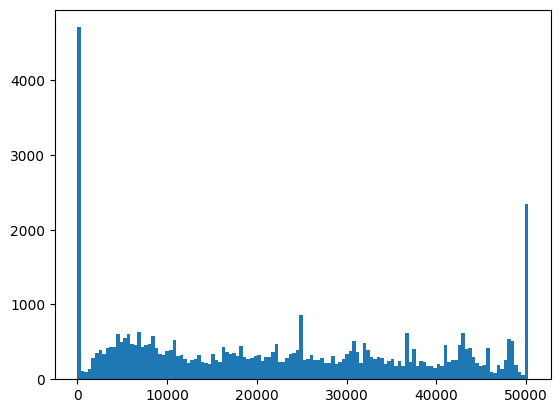

In [17]:
import matplotlib.pyplot as plt

norm_df = (df - df.min()) * (50_257-2) / ( df.max() - df.min() )

# convert to int
norm_df = norm_df.astype(int)

display(norm_df.head())
print(norm_df.shape)

values = norm_df.values.flatten()

print((norm_df <= 2).sum())

# get histogram of the data
plt.hist(values, bins=128)
plt.show()

## Weird warning issue

In [42]:
import warnings

df = pd.read_csv('rcalix-clean-test.csv', header=None)

norm_df = (df - df.min()) * (50_257-2) / ( df.max() - df.min() )
# print(f"{df.min()} {df.max()}")

display(norm_df.head())

# TODO should give more info
with warnings.catch_warnings():
    warnings.filterwarnings('error')
    for i, v in enumerate(norm_df.values.flatten()):
        try:
            token = v.astype(int)
        except RuntimeWarning:
            print(f'Error at {i} with value {v}')
            v2 = df.values.flatten()[i]
            # print min and max of the column
            mi = df.iloc[i % df.shape[0]].min()
            ma = df.iloc[i % df.shape[0]].max()
            print(mi, ma)
            norm = (v2 - mi) * (50_257-2) / ( ma - mi )
            print(f'Original value: {v2} Normalized value: {norm}')
            break

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,19175.053038,17384.838167,11682.548356,50255.000000,49377.490037,19881.127112,48451.245413,0.0,8517.796610,24035.0,...,16836.851391,42782.679584,22859.640815,38582.883430,50255.0,45193.220503,42530.985909,0.0,24207.090955,47861.904762
1,18945.244374,16477.206735,9706.057015,49199.534331,49155.441597,18211.232301,49134.373655,0.0,36626.525424,28405.0,...,18490.044123,43808.287195,21045.408946,44094.724054,50255.0,44969.568081,39498.773975,50255.0,17909.390283,47861.904762
2,20381.728943,28141.016525,9430.637503,49419.819226,49260.835170,19280.579291,48503.529757,0.0,38330.084746,30590.0,...,19270.953558,44614.129858,9978.414157,30153.006173,50255.0,45253.298942,37288.013674,0.0,0.000000,47861.904762
3,22795.063509,30350.064283,12013.066610,48600.401092,49185.271329,19914.316583,48861.802228,0.0,34071.186441,41515.0,...,22811.835552,49082.872996,17054.015452,35340.613444,50255.0,45081.744294,39497.930569,0.0,11435.126412,47861.904762
4,20046.855438,17507.254052,11341.092970,48318.513443,48320.550744,13617.988415,48846.011903,0.0,10221.355932,45885.0,...,10654.163938,13552.720896,3628.533041,0.000000,50255.0,45056.128070,41840.488196,0.0,20812.015426,47861.904762


Error at 11 with value nan
0.0 9094.439984472729
Original value: 12.0 Normalized value: 66.31084498106827


## Stride test

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,0,1,2,3,4,5,6
2,0,1,2,3,4,5,6
3,0,1,2,3,4,5,6
4,0,1,2,3,4,5,6


3684


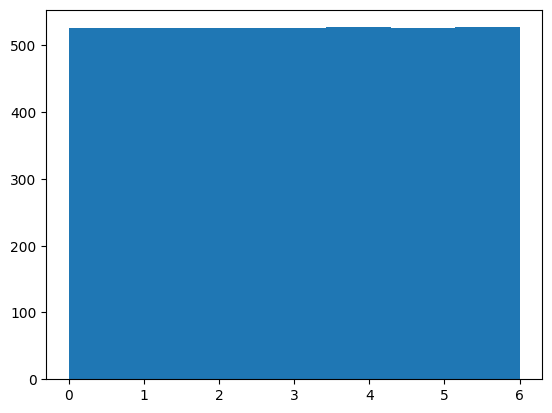

,value,count
0,0,526
1,1,526
2,2,526
3,3,526
4,4,527
5,5,526
6,6,527


In [1]:
import numpy as np
import pandas as pd

COLS = 7

# create row of 35 values from 0 to 34
row = np.arange(COLS)

# repeat a bunch of times
df = pd.DataFrame(np.tile(row, (10000, 1)))

display(df.head())

tokens = df.values.flatten()

dataset = []
real = []
max_length = COLS*3
stride = 19 # 64 -> 3 7 11 15 19 23 27 31 35
for i in range(0, len(tokens) - max_length, stride):
    sequence = tokens[i:i + max_length]
    if len(sequence) == max_length:
        input_sequence = np.array(sequence[:-1])#, dtype=np.int64) # dont include the last token
        target_sequence = np.array(sequence[1:])#, dtype=np.int64) # dont include the first token

        dataset.append({
            'input_ids': input_sequence,
            'labels': target_sequence
        })
        real.append(target_sequence[-1])

print(len(dataset))

# get the distribution of the last token and put in histogram
import matplotlib.pyplot as plt
plt.hist(real, bins=COLS)
plt.show()

# check distribution of dataset values
# if the distribution is the same as the original dataset, then the dataset is good
# if the dist of the last is equal, then the dataset should follow

# put unique values in a dataframe
unique = set(real)
df = pd.DataFrame(real, columns=['value'])
df['count'] = 1
df = df.groupby('value').count().reset_index()
# df.drop(columns=['value'], inplace=True)
display(df)


samples: 1513


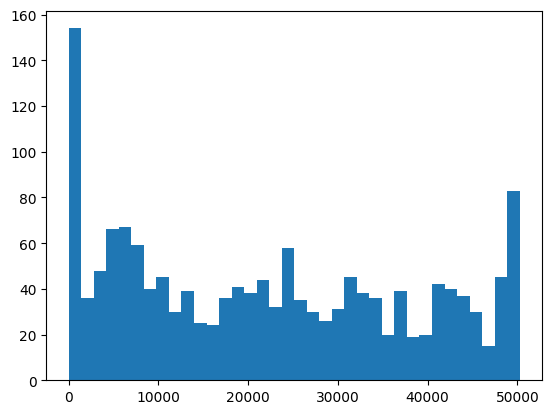

,value,count
0,0,142
1,18,1
2,601,1
3,704,1
4,851,1
...,...,...
1148,49528,1
1149,49665,1
1150,49931,1
1151,50254,7


In [23]:
import pandas as pd
import numpy as np

samples_per_file = None
max_length = 512
stride = 31
dataset = []
real = []

df = pd.read_csv('rcalix-clean.csv', header=None)
df = df.dropna() # i think axis=1 drops columns
# drop any columns with str
df = df.drop(df.select_dtypes(['object']), axis=1)

# # only get first row
# df = df.iloc[:, 0]

norm_df = (df - df.min()) * (50_257-2) / ( df.max() - df.min() )
n_cols = 1#norm_df.shape[1]

tokens = norm_df.values.flatten().astype(int)

# Create sequences with sliding window
samples = 0
for i in range(0, len(tokens) - max_length, stride):
    sequence = tokens[i:i + max_length]
    if len(sequence) == max_length:
        input_sequence = np.array(sequence[:-n_cols])#, dtype=np.int64) # dont include the last token
        target_sequence = np.array(sequence[n_cols:])#, dtype=np.int64) # dont include the first token

        dataset.append({
            'input_ids': input_sequence,
            'labels': target_sequence
        })

        real.append(sequence[-1])

    samples += 1
    if samples_per_file is not None and samples >= samples_per_file: # 1024
        print('max samples from file')
        break
print('samples:', samples)

import matplotlib.pyplot as plt
plt.hist(real, bins=36)
plt.show()

# check distribution of dataset values
# if the distribution is the same as the original dataset, then the dataset is good
# if the dist of the last is equal, then the dataset should follow

# put unique values in a dataframe
unique = set(real)
df = pd.DataFrame(real, columns=['value'])
df['count'] = 1
df = df.groupby('value').count().reset_index()
# df.drop(columns=['value'], inplace=True)
display(df)

In [17]:
df = pd.read_csv('rcalix.csv', header=0)
display(df.head())
print(df.shape)

# remove first column, it's just an index
df = df.drop(columns=['Unnamed: 0'])

df = df.dropna() # i think axis=1 drops columns
# drop any columns with str
df = df.drop(df.select_dtypes(['object']), axis=1)

df = df.drop(columns=['sec', 'min', 'hour', 'day', 'month', 'year'])

# drop any column with the min and max being the same.
# this will cause a division by zero error
# df = df.loc[:, (df != df.iloc[0]).any()] # does this remove the first row?
df = df.loc[:, (df.min() != df.max())]

df = (df - df.min()) * (50_257-2) / ( df.max() - df.min() )

display(df.head())
print(df.shape)

# split some of the end for testing
df_train = df.iloc[:int(df.shape[0] * 0.85)]
df_eval = df.iloc[int(df.shape[0] * 0.85):int(df.shape[0] * 0.95)]
df_test = df.iloc[int(df.shape[0] * 0.95):]

# get number of values in each df
print(len(df_train.values.flatten()))
print(len(df_eval.values.flatten()))
print(len(df_test.values.flatten()))

df_train.to_csv('rcalix-clean-train.csv', index=False, header=False)
df_eval.to_csv('rcalix-clean-eval.csv', index=False, header=False)
df_test.to_csv('rcalix-clean-test.csv', index=False, header=False)

,Unnamed: 0,delta_SI,mov_avg_SI,SI_f1,Date_Map,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,...,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0,0.000000,0.0,0.719500,2022-01-01 00:45:00,4.242439,2161.425209,9306.840913,184.818611,0.0,...,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,1,0.000000,0.0,0.710486,2022-01-01 08:43:00,4.174343,2168.238915,9336.364456,185.993447,0.0,...,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,2,-0.044380,0.0,0.666106,2022-01-01 10:17:00,4.126144,2167.779119,9419.200115,185.828474,0.0,...,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,3,0.009040,0.0,0.675145,2022-01-01 12:40:00,4.120736,2166.974740,9564.165802,185.924481,0.0,...,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,4,0.101686,0.0,0.776831,2022-01-01 15:06:00,4.120331,2166.384674,9648.247637,185.942943,0.0,...,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0


(1394, 37)


,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,...,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,17017.081106,20116.861162,5996.515919,5679.330698,47424.090261,34010.109458,29863.694993,0.0,0.0,17237.223246,...,7347.502269,20122.632501,23748.400046,31699.305116,50255.0,33577.961028,32852.442374,0.0,43782.025432,1291.600467
1,17017.081106,20116.861162,5831.966076,5486.787325,48659.302335,34118.037535,31256.685723,0.0,0.0,12260.277710,...,7330.925208,13827.865481,21551.216805,22531.910732,50255.0,32564.444362,33702.715393,0.0,43782.025432,1291.600467
2,16469.448766,20116.861162,5021.843425,5350.506006,48575.948988,34420.856667,31061.079010,0.0,0.0,17965.558053,...,8016.976266,11454.417728,24449.639710,23636.420389,50255.0,32540.222242,32750.189245,50255.0,43769.203968,1291.600467
3,17128.628434,20116.861162,5186.857451,5335.214420,48430.128314,34950.802150,31174.913289,0.0,0.0,12988.612517,...,5830.348888,8565.012815,21223.976394,20212.448870,50255.0,32363.542754,33569.833008,0.0,42673.998074,1291.600467
4,18271.844902,20116.861162,7043.052743,5334.071324,48323.159150,35258.176880,31196.803624,0.0,0.0,14930.835029,...,6615.825630,9837.736116,21551.216805,19218.392277,50255.0,32554.305584,33020.512543,50255.0,44275.121550,1291.600467


(1394, 29)
34336
4060
2030


## Compare Datasets

In [3]:
import pandas as pd

df_train = pd.read_csv('rcalix-clean-train.csv', header=None)
df_eval = pd.read_csv('rcalix-clean-eval.csv', header=None)
df_test = pd.read_csv('rcalix-clean-test.csv', header=None)

# get min,max, mean, std of each column
display(df_train.describe())
display(df_eval.describe())
display(df_test.describe())

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,...,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000
mean,17017.715260,20147.880426,9415.560623,12029.101160,43780.143354,29088.830130,33100.617778,10265.359266,23896.592061,23533.040541,...,9418.143786,23512.085062,26815.311741,29843.012040,49993.976663,35122.147619,33414.195058,22389.790963,43192.438849,6375.832900
std,2459.418628,3628.750719,4366.944258,6632.960309,10418.154361,8141.682857,9491.542158,12960.040902,15134.627153,15133.793130,...,5128.216985,6185.935797,8593.233185,9711.370401,2549.162890,8798.440460,5338.887389,20520.139143,2490.853623,5667.212812
min,0.000000,1532.614819,0.000000,1884.685426,0.000000,3.123172,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1869.951712,0.000000,0.000000,0.000000,7616.306167,0.000000,0.000000,0.000000
25%,15753.650535,18307.259228,6711.527388,7918.932918,47462.605103,25068.317612,27589.766214,0.000000,11073.135593,10925.000000,...,6135.578597,20286.020270,21364.217202,22311.015121,50255.000000,28027.630705,30138.743269,0.000000,42748.171213,3639.964953
50%,17023.743563,20116.861162,9124.169523,10635.766842,48037.655591,29663.140270,31061.705586,0.000000,23849.830508,24035.000000,...,8866.688570,24663.124092,25337.861212,33079.936922,50255.000000,37466.425870,33989.097988,25127.500000,43523.979421,6223.165888
75%,18222.073051,21598.727055,11305.428145,16150.239896,48373.174494,34667.177354,42778.953107,22004.934161,37478.305085,37145.000000,...,11815.079034,27862.108564,30339.985345,37000.936715,50255.000000,42795.513597,36859.210892,50255.000000,44192.304858,7514.766355
max,50255.000000,50255.000000,50255.000000,50255.000000,50067.546450,50255.000000,50255.000000,40834.145392,50255.000000,50255.000000,...,43397.760904,46402.451345,50255.000000,50255.000000,50255.000000,50255.000000,50255.000000,50255.000000,50255.000000,50255.000000


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.0,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,17012.807209,19864.076843,11786.321207,9575.127253,48101.972851,28578.111924,32657.517755,0.0,26733.713075,23348.285714,...,7649.691218,30439.972143,18265.769986,26546.002124,50038.407323,33801.219482,32796.759410,27281.285714,43149.245032,5523.735265
std,3279.010700,5503.135158,6877.567900,2612.039213,2720.224503,5231.872117,5495.985189,0.0,14977.132586,15131.510380,...,5143.905589,8338.173919,6953.911888,6586.260104,2084.416418,4375.779323,4794.718459,25124.917390,1506.897624,3726.037047
min,2607.321194,0.000000,4216.728226,1703.392423,20854.358278,0.000000,1592.661715,0.0,0.000000,0.000000,...,1740.300453,11076.054384,0.000000,8394.243939,26369.550575,7780.976105,0.000000,0.000000,39012.973652,3639.964953
25%,15608.070716,17801.192312,7651.972076,9931.289217,47930.452502,28597.356418,30269.666768,0.0,15119.088983,10925.000000,...,5711.549959,23657.000339,13113.050263,21289.345259,50255.000000,32329.636492,31225.961255,0.000000,42518.806472,4344.474299
50%,16972.350058,20132.610199,9775.116858,10640.585881,48544.168091,30206.647528,30922.997432,0.0,27682.838983,21850.000000,...,6785.670769,28911.238607,19400.765665,26618.579633,50255.000000,32635.948155,32858.477226,50255.000000,43450.924834,4344.474299
75%,18399.890336,21964.792362,14372.813022,10832.161024,48845.739087,30921.447677,36668.119173,0.0,41098.368644,37145.000000,...,8596.126121,37957.829855,24262.640107,31478.409505,50255.000000,37604.329920,35045.610988,50255.000000,44150.901528,5401.238318
max,30792.892999,37141.034725,38961.154110,16726.839507,50255.000000,34167.499243,46585.940338,0.0,49403.220339,48070.000000,...,50255.000000,50255.000000,30713.984644,41529.407398,50255.000000,43388.063548,43990.643176,50255.000000,45675.427806,28089.761299


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,17017.402483,19990.672554,6802.270863,6539.384765,47304.883532,33312.151849,28403.396506,1265.997320,25322.192494,24097.428571,...,6842.711877,17819.467262,25962.965846,31418.448656,50039.491935,30179.047524,31869.707456,25127.500000,44113.969050,2715.647882
std,1944.897229,2113.980766,2559.665301,2857.359996,4078.102197,3736.030524,7240.414586,7503.845785,13705.351085,14373.669081,...,2431.852665,5834.321156,2925.849190,4730.655701,1803.069836,6674.862695,4669.997904,25308.928349,816.934747,885.261943
min,12950.549011,15053.302389,2758.601584,0.000000,27143.742154,23402.717862,1095.992121,0.000000,0.000000,0.000000,...,3073.978629,2820.607988,18793.034709,21648.307213,35169.435435,6261.242640,15897.318011,0.000000,42564.867142,1291.600467
25%,15712.999139,18352.342164,4896.698256,5378.042231,48174.160451,31259.913309,30195.461983,0.000000,12776.694915,11471.250000,...,4964.303502,12546.550769,24075.649386,27419.351239,50255.000000,32245.208712,32143.779775,0.000000,43609.677182,1878.691589
50%,17030.933162,20336.589241,6499.572511,5503.454543,48339.776806,33849.054372,30911.479789,0.000000,26405.169492,25127.500000,...,6481.682842,19675.465662,26436.461739,33079.942190,50255.000000,32404.760016,33276.647398,25127.500000,43910.321806,2583.200935
75%,18348.700925,21529.620176,7853.326650,10357.065491,48624.468107,34736.252390,31123.177822,0.000000,36413.580508,34960.000000,...,8166.902218,22272.486963,27967.483282,34681.474831,50255.000000,32513.901845,33929.948269,50255.000000,44552.324049,3639.964953
max,22864.224389,24623.015166,15142.993702,11243.748167,49183.485520,43589.373990,31968.126418,50255.000000,50255.000000,50255.000000,...,13964.573126,26417.412660,31742.464766,38768.143776,50255.000000,35295.047421,36431.787856,50255.000000,46413.099361,3757.383178


## Check for Similarity

In [16]:
import pandas as pd

df = pd.read_csv('rcalix-clean-train.csv', header=None)

# Check for exact duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Check for rows with small differences
def find_similar_rows(df, threshold=0.1):
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            difference = np.mean(np.abs(df.iloc[i] - df.iloc[j]))
            if difference < threshold:
                print(f"Rows {i} and {j} are very similar (diff={difference})")

# Check the distribution of values in each column
desc = df.describe()
display(desc)

# write to csv
df.describe().to_csv('train-desc.csv', index=True, header=False)

df_eval = pd.read_csv('rcalix-clean-eval.csv', header=None)
df_eval.describe().to_csv('eval-desc.csv', index=True, header=False)
display(df_eval.describe())

display(df.head())
display(df_eval.head())

Number of duplicate rows: 0


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,...,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000
mean,17017.715260,20147.880426,9415.560623,12029.101160,43780.143354,29088.830130,33100.617778,10265.359266,23896.592061,23533.040541,...,9418.143786,23512.085062,26815.311741,29843.012040,49993.976663,35122.147619,33414.195058,22389.790963,43192.438849,6375.832900
std,2459.418628,3628.750719,4366.944258,6632.960309,10418.154361,8141.682857,9491.542158,12960.040902,15134.627153,15133.793130,...,5128.216985,6185.935797,8593.233185,9711.370401,2549.162890,8798.440460,5338.887389,20520.139143,2490.853623,5667.212812
min,0.000000,1532.614819,0.000000,1884.685426,0.000000,3.123172,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1869.951712,0.000000,0.000000,0.000000,7616.306167,0.000000,0.000000,0.000000
25%,15753.650535,18307.259228,6711.527388,7918.932918,47462.605103,25068.317612,27589.766214,0.000000,11073.135593,10925.000000,...,6135.578597,20286.020270,21364.217202,22311.015121,50255.000000,28027.630705,30138.743269,0.000000,42748.171213,3639.964953
50%,17023.743563,20116.861162,9124.169523,10635.766842,48037.655591,29663.140270,31061.705586,0.000000,23849.830508,24035.000000,...,8866.688570,24663.124092,25337.861212,33079.936922,50255.000000,37466.425870,33989.097988,25127.500000,43523.979421,6223.165888
75%,18222.073051,21598.727055,11305.428145,16150.239896,48373.174494,34667.177354,42778.953107,22004.934161,37478.305085,37145.000000,...,11815.079034,27862.108564,30339.985345,37000.936715,50255.000000,42795.513597,36859.210892,50255.000000,44192.304858,7514.766355
max,50255.000000,50255.000000,50255.000000,50255.000000,50067.546450,50255.000000,50255.000000,40834.145392,50255.000000,50255.000000,...,43397.760904,46402.451345,50255.000000,50255.000000,50255.000000,50255.000000,50255.000000,50255.000000,50255.000000,50255.000000


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.0,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,17012.807209,19864.076843,11786.321207,9575.127253,48101.972851,28578.111924,32657.517755,0.0,26733.713075,23348.285714,...,7649.691218,30439.972143,18265.769986,26546.002124,50038.407323,33801.219482,32796.759410,27281.285714,43149.245032,5523.735265
std,3279.010700,5503.135158,6877.567900,2612.039213,2720.224503,5231.872117,5495.985189,0.0,14977.132586,15131.510380,...,5143.905589,8338.173919,6953.911888,6586.260104,2084.416418,4375.779323,4794.718459,25124.917390,1506.897624,3726.037047
min,2607.321194,0.000000,4216.728226,1703.392423,20854.358278,0.000000,1592.661715,0.0,0.000000,0.000000,...,1740.300453,11076.054384,0.000000,8394.243939,26369.550575,7780.976105,0.000000,0.000000,39012.973652,3639.964953
25%,15608.070716,17801.192312,7651.972076,9931.289217,47930.452502,28597.356418,30269.666768,0.0,15119.088983,10925.000000,...,5711.549959,23657.000339,13113.050263,21289.345259,50255.000000,32329.636492,31225.961255,0.000000,42518.806472,4344.474299
50%,16972.350058,20132.610199,9775.116858,10640.585881,48544.168091,30206.647528,30922.997432,0.0,27682.838983,21850.000000,...,6785.670769,28911.238607,19400.765665,26618.579633,50255.000000,32635.948155,32858.477226,50255.000000,43450.924834,4344.474299
75%,18399.890336,21964.792362,14372.813022,10832.161024,48845.739087,30921.447677,36668.119173,0.0,41098.368644,37145.000000,...,8596.126121,37957.829855,24262.640107,31478.409505,50255.000000,37604.329920,35045.610988,50255.000000,44150.901528,5401.238318
max,30792.892999,37141.034725,38961.154110,16726.839507,50255.000000,34167.499243,46585.940338,0.0,49403.220339,48070.000000,...,50255.000000,50255.000000,30713.984644,41529.407398,50255.000000,43388.063548,43990.643176,50255.000000,45675.427806,28089.761299


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,17017.081106,20116.861162,5996.515919,5679.330698,47424.090261,34010.109458,29863.694993,0.0,38330.084746,0.0,...,7347.502269,20122.632501,23748.400046,31699.305116,50255.0,33577.961028,32852.442374,0.0,43782.025432,1291.600467
1,17017.081106,20116.861162,5831.966076,5486.787325,48659.302335,34118.037535,31256.685723,0.0,36626.525424,17480.0,...,7330.925208,13827.865481,21551.216805,22531.910732,50255.0,32564.444362,33702.715393,0.0,43782.025432,1291.600467
2,16469.448766,20116.861162,5021.843425,5350.506006,48575.948988,34420.856667,31061.079010,0.0,14480.254237,21850.0,...,8016.976266,11454.417728,24449.639710,23636.420389,50255.0,32540.222242,32750.189245,50255.0,43769.203968,1291.600467
3,17128.628434,20116.861162,5186.857451,5335.214420,48430.128314,34950.802150,31174.913289,0.0,34071.186441,26220.0,...,5830.348888,8565.012815,21223.976394,20212.448870,50255.0,32363.542754,33569.833008,0.0,42673.998074,1291.600467
4,18271.844902,20116.861162,7043.052743,5334.071324,48323.159150,35258.176880,31196.803624,0.0,5110.677966,32775.0,...,6615.825630,9837.736116,21551.216805,19218.392277,50255.0,32554.305584,33020.512543,50255.0,44275.121550,1291.600467


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,20395.258878,15822.682867,11940.094596,10771.892683,44963.237625,27530.619614,35323.878399,0.0,21294.491525,8740.0,...,9156.629954,29581.992133,11827.450111,26397.684011,50255.0,30796.409271,30842.608389,0.0,42837.246518,4344.474299
1,17965.998548,18605.041167,13343.845719,10787.673128,45596.334097,27448.810717,34798.127785,0.0,11924.915254,13110.0,...,4785.170867,20672.994727,13557.152085,20102.006333,50255.0,32116.857255,30867.260283,50255.0,42837.246518,4344.474299
2,18201.684707,18553.249197,15096.251738,10801.481018,50174.332371,27356.704902,29252.670589,0.0,47699.661017,17480.0,...,5720.728892,27999.702414,11266.469066,24740.919520,50255.0,33493.854436,33076.695605,0.0,42837.246518,4344.474299
3,13693.608949,18935.109407,10179.777900,10811.343797,50255.000000,27346.132226,29154.267151,0.0,1703.559322,21850.0,...,7272.799478,31026.701177,14772.631857,30153.004226,50255.0,33511.534073,32699.559190,50255.0,42837.246518,4344.474299
4,15009.835721,19669.850901,7210.422673,10821.964461,50111.025109,27833.175052,29338.176766,0.0,0.000000,28405.0,...,10045.897032,32161.817487,21457.716980,37111.389800,50255.0,31240.887959,32811.015163,50255.0,42837.246518,4344.474299


In [14]:
import pandas as pd

vocab_size = 3000

df = pd.read_csv('ETTh1.csv', header=0)
display(df.head())
print(df.shape)

df = df.dropna() # i think axis=1 drops columns
# drop any columns with str
df = df.drop(df.select_dtypes(['object']), axis=1)

# drop any column with the min and max being the same.
# this will cause a division by zero error
# df = df.loc[:, (df != df.iloc[0]).any()] # does this remove the first row?
df = df.loc[:, (df.min() != df.max())]

df = (df - df.min().min()) * (vocab_size-2) / ( df.max().max() - df.min().min() )
df = df.astype(int)

display(df.head())

values = df.values.flatten()
# get unique values
unique = set(values)
print('unique:', len(unique))

print(df.min(), df.max())
print(df.shape)

# split some of the end for testing
df_train = df.iloc[:int(df.shape[0] * 0.85)]
df_eval = df.iloc[int(df.shape[0] * 0.85):int(df.shape[0] * 0.95)]
df_test = df.iloc[int(df.shape[0] * 0.95):]

print('------ ranges ------')
for split, name in [(df_train, 'train'), (df_eval, 'eval'), (df_test, 'test')]:
    print(name)
    # combine min and max for each column into dataframe
    ranges = pd.DataFrame({'min': split.min(), 'max': split.max()})
    display(ranges)

print('------ unique values ------')
# get number of values in each df
print(len(df_train.values.flatten()))
print(len(df_eval.values.flatten()))
print(len(df_test.values.flatten()))

# maybe this is unique rows?
print(f"uniques: {df_train.nunique().sum()} {df_eval.nunique().sum()} {df_test.nunique().sum()}")

print('------- heads -------')
display(df_train.head())
display(df_eval.head())
display(df_test.head())

df_train.to_csv('etth1-clean-train.csv', index=False, header=False)
df_eval.to_csv('etth1-clean-eval.csv', index=False, header=False)
df_test.to_csv('etth1-clean-test.csv', index=False, header=False)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


(17420, 8)


,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,1303,1142,1125,1077,1235,1114,2345
1,1298,1145,1120,1075,1232,1115,2229
2,1275,1131,1111,1072,1217,1109,2229
3,1272,1139,1111,1074,1218,1111,2114
4,1283,1139,1120,1077,1221,1111,1983


unique: 1751
HUFL     100
HULL     857
MUFL       0
MULL     807
LUFL    1007
LULL    1000
OT       885
dtype: int64 HUFL    2054
HULL    1484
MUFL    1789
MULL    1384
LUFL    1416
LULL    1186
OT      2998
dtype: int64
(17420, 7)
------ ranges ------
train


,min,max
HUFL,230,2054
HULL,857,1484
MUFL,131,1789
MULL,807,1377
LUFL,1007,1416
LULL,1000,1186
OT,885,2998


eval


,min,max
HUFL,100,1854
HULL,959,1481
MUFL,0,1652
MULL,912,1384
LUFL,1083,1326
LULL,1068,1164
OT,1019,1781


test


,min,max
HUFL,303,1823
HULL,1103,1388
MUFL,211,1577
MULL,1053,1255
LUFL,1119,1317
LULL,1057,1172
OT,1185,1663


------ unique values ------
103649
12194
6097
uniques: 3117 1972 1361
------- heads -------


,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,1303,1142,1125,1077,1235,1114,2345
1,1298,1145,1120,1075,1232,1115,2229
2,1275,1131,1111,1072,1217,1109,2229
3,1272,1139,1111,1074,1218,1111,2114
4,1283,1139,1120,1077,1221,1111,1983


,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
14807,1588,1221,1474,1170,1161,1084,1259
14808,1583,1216,1491,1167,1146,1077,1262
14809,1569,1247,1502,1206,1136,1075,1271
14810,1552,1187,1474,1149,1136,1078,1253
14811,1580,1216,1501,1168,1138,1082,1259


,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
16549,1216,1193,1119,1149,1156,1102,1357
16550,1292,1210,1180,1161,1152,1105,1360
16551,1204,1168,1099,1113,1167,1111,1366
16552,1456,1187,1339,1108,1177,1106,1295
16553,1399,1162,1225,1107,1176,1104,1244
